In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ML Datasets/GWQ_2010-2018.xlsx').iloc[:10000, :]

In [ ]:
df.head()

,SITE_ID,WRIS ID,LATITUDE,LONGITUDE,SITE_TYPE,STATE_NAME,DISTRICT_NAME,TAHSIL_NAME,BLOCK_NAME,SITE_NAME,...,FLUORIDE,SAR,RSC,SiO2,PO4,TDS,Turbidity,%Na,Arsenic,LR. No
0,W115159092441001,W23881,11.866389,92.736111,Dug Well,Andaman And Nicobar,A & N Islands,Ferrargunj,South Andaman,Shoal Bay– 15 No.,...,0.37,NaN,NaN,13.97,NaN,217.748,NaN,NaN,NaN,NaN
1,New,W38814,12.186944,92.791667,Dug Well,Andaman And Nicobar,A & N Islands,Middle Andaman,Baratang Island,South Creek (Sundergarh),...,0.24,0,0,15.14,0,360.745,,,0,0
2,W123014092513301,W24095,12.503889,92.859167,Dug Well,Andaman And Nicobar,A & N Islands,Middle Andaman,Mayabunder,Bakultala,...,0.96,0,0,7.67,0,239.246,NaN,NaN,0,NaN
3,W123129092581301,W24112,12.524722,92.970278,Dug Well,Andaman And Nicobar,A & N Islands,Middle Andaman,Mayabunder,Nimbutala,...,1.02,0,0,0,0,253.22,NaN,NaN,0,NaN
4,W123030092573801,W24098,12.508333,92.960556,Dug Well,Andaman And Nicobar,A & N Islands,Middle Andaman,Mayabunder,Padmanavapuram,...,0.74,0,0,10.34,0,185.361,NaN,NaN,0,NaN


In [ ]:
df.shape

(10000, 37)

In [ ]:
df.columns

Index(['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE',
       'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME',
       'BASIN_NAME', 'PROJECT_NAME', 'year', 'PH', 'EC', 'TH',
       'TOT_ALKALINITY', 'CA', 'MG', 'NA', 'K', 'FE', 'CARBONATE',
       'BICARBONATE', 'CHLORIDE', 'SULPHATE', 'NITRATE', 'FLUORIDE', 'SAR',
       'RSC', 'SiO2', 'PO4', 'TDS', 'Turbidity', '%Na', 'Arsenic', 'LR. No'],
      dtype='object')

In [ ]:
null_vals = df.isnull().sum()
null_vals.sort_values()

SITE_ID              0
WRIS ID              0
SITE_TYPE            0
STATE_NAME           0
DISTRICT_NAME        0
NA                   0
CA                   0
SITE_NAME            0
BASIN_NAME           0
PROJECT_NAME         0
year                 0
PH                   0
EC                   0
TH                   0
SULPHATE             1
CHLORIDE             1
MG                   2
BICARBONATE          4
K                    7
FLUORIDE            11
BLOCK_NAME          34
TAHSIL_NAME         34
LATITUDE            93
LONGITUDE           93
CARBONATE          599
NITRATE            846
TOT_ALKALINITY    1888
FE                2465
SAR               2487
RSC               2487
SiO2              6798
TDS               6833
PO4               6967
Arsenic           7653
LR. No            8787
Turbidity         9229
%Na               9479
dtype: int64

In [ ]:
drop_cols = null_vals[null_vals.values>df.shape[0]*0.4].index
drop_cols

Index(['SiO2', 'PO4', 'TDS', 'Turbidity', '%Na', 'Arsenic', 'LR. No'], dtype='object')

In [ ]:
df = df.drop(drop_cols, axis = 1)

In [ ]:
object_df = df.select_dtypes(include = object)
num_df = df.select_dtypes(exclude = object)

In [ ]:
object_df.columns

Index(['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE',
       'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME',
       'BASIN_NAME', 'PROJECT_NAME', 'PH', 'EC', 'TH', 'TOT_ALKALINITY', 'CA',
       'MG', 'NA', 'K', 'FE', 'CARBONATE', 'BICARBONATE', 'CHLORIDE',
       'SULPHATE', 'NITRATE', 'FLUORIDE', 'SAR', 'RSC'],
      dtype='object')

In [ ]:
num_df.columns

Index(['year'], dtype='object')

In [ ]:
obj_null = object_df.isnull().sum().sort_values()
tot_entries = df.shape[0]
obj_null

SITE_ID              0
NA                   0
CA                   0
EC                   0
PH                   0
PROJECT_NAME         0
BASIN_NAME           0
SITE_NAME            0
TH                   0
WRIS ID              0
DISTRICT_NAME        0
STATE_NAME           0
SITE_TYPE            0
SULPHATE             1
CHLORIDE             1
MG                   2
BICARBONATE          4
K                    7
FLUORIDE            11
TAHSIL_NAME         34
BLOCK_NAME          34
LATITUDE            93
LONGITUDE           93
CARBONATE          599
NITRATE            846
TOT_ALKALINITY    1888
FE                2465
SAR               2487
RSC               2487
dtype: int64

In [ ]:
cols_to_num = ['EC', 'PH', 'CHLORIDE', 'LONGITUDE', 'LATITUDE', 'FLUORIDE',
       'SULPHATE', 'CA', 'NA', 'MG', 'K', 'BICARBONATE', 'TH', 'NITRATE',
       'CARBONATE', 'SAR', 'TOT_ALKALINITY', 'FE', 'RSC']
for col in cols_to_num:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [ ]:
label_encoding_cols = ['STATE_NAME', 'DISTRICT_NAME', 'BASIN_NAME', 'SITE_TYPE']

for col in label_encoding_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
remove_cols = list(df.select_dtypes(include = ['object']).columns)

In [ ]:
remove_cols.append('PH')
X = df.drop(remove_cols, axis = 1)
y = df['PH']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 25)

In [ ]:
def imputation(df):
    imputer = KNNImputer(n_neighbors=4)
    num_arr = imputer.fit_transform(df)
    return num_arr

In [ ]:
X_train = imputation(X_train)
X_test = imputation(X_test)

In [ ]:
y_train = y_train.fillna(method = 'ffill')
y_test = y_test.fillna(method = 'ffill')

In [ ]:
def scaling(arr):
    scaler = StandardScaler()
    return scaler.fit_transform(arr)

In [ ]:
X_train = scaling(X_train)
X_test = scaling(X_test)

In [ ]:
def psuedo_random(shape, dtype=None):
    nums = np.random.randint(-100, 100, shape)
    return nums

In [ ]:
model_psuedo_random = keras.Sequential([
    keras.layers.Dense(256, activation = 'relu', kernel_initializer = psuedo_random,  input_shape = [X_train.shape[1]]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, kernel_initializer = psuedo_random,  activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer = psuedo_random,  activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer = psuedo_random, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,kernel_initializer = psuedo_random, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

In [ ]:
model_psuedo_random.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

In [ ]:
file_path = '/content/drive/MyDrive/ML Datasets/Random Numbers/random4_comma seperated.dat'
quant_nums = list(pd.read_csv(file_path).to_numpy().flatten())

In [ ]:
def quant_random(shape, dtype=None):
    nums = np.random.choice(quant_nums, shape, replace = True)
    return nums

In [ ]:
model_quant_random = keras.Sequential([
    keras.layers.Dense(256, activation = 'relu', kernel_initializer=quant_random,  input_shape = [X_train.shape[1]]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, kernel_initializer=quant_random,  activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer=quant_random,  activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer=quant_random, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,kernel_initializer=quant_random, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

In [ ]:
model_quant_random.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

In [ ]:
def multiruns(psuedo_random, quant_random, n_runs = 20, epochs = 20):
    mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant = [], [], [], [], [], []
    print(n_runs)
    for run in range(n_runs):
        history_psuedo = psuedo_random.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)
        history_quant = quant_random.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)

        pred_psuedo = model_psuedo_random.predict(X_test)
        pred_quant = model_quant_random.predict(X_test)

        mse_psuedo.append(mean_squared_error(y_test, pred_psuedo))
        mse_quant.append(mean_squared_error(y_test, pred_quant))

        mae_psuedo.append(mean_absolute_error(y_test, pred_psuedo))
        mae_quant.append(mean_absolute_error(y_test, pred_quant))

        r2_psuedo.append(r2_score(y_test, pred_psuedo))
        r2_quant.append(r2_score(y_test, pred_quant))

    return mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant

In [ ]:
mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant = multiruns(model_psuedo_random, model_quant_random, n_runs = 20, epochs = 20)

20
Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 0.1098 - mse: 0.1098 - mae: 0.2517 - val_loss: 0.1426 - val_mse: 0.1426 - val_mae: 0.2649
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.1129 - mse: 0.1129 - mae: 0.2533 - val_loss: 0.1427 - val_mse: 0.1427 - val_mae: 0.2656
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1128 - mse: 0.1128 - mae: 0.2556 - val_loss: 0.1393 - val_mse: 0.1393 - val_mae: 0.2646
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.1108 - mse: 0.1108 - mae: 0.2518 - val_loss: 0.1418 - val_mse: 0.1418 - val_mae: 0.2649
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.1112 - mse: 0.1112 - mae: 0.2517 - val_loss: 0.1416 - val_mse: 0.1416 - val_mae: 0.2639
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.1119 - mse: 0.1119 - mae: 0.2531 - val_loss: 0.1430 - val_mse: 0.1430 - val_mae: 0.2640
Epoch 7/20
10

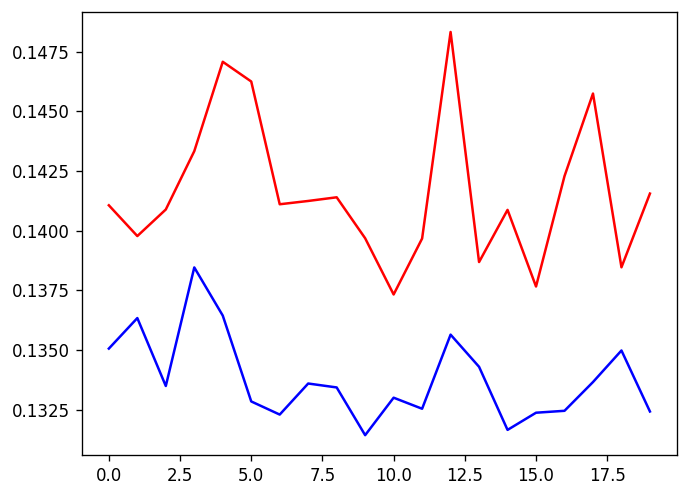

In [ ]:
plt.figure(dpi = 120)
plt.plot(mse_psuedo, c = 'r')
plt.plot(mse_quant, c = 'b')
plt.lenged()
plt.title('MSE')

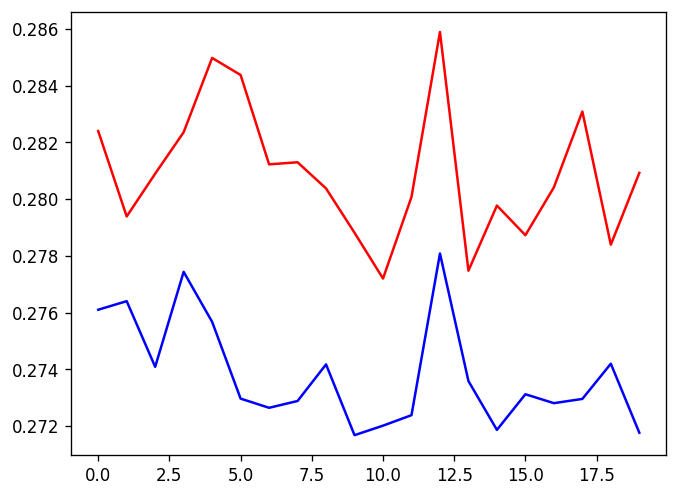

In [ ]:
plt.figure(dpi = 120)
plt.plot(mae_psuedo, c = 'r')
plt.plot(mae_quant, c = 'b')
plt.lenged()
plt.title("MAE")

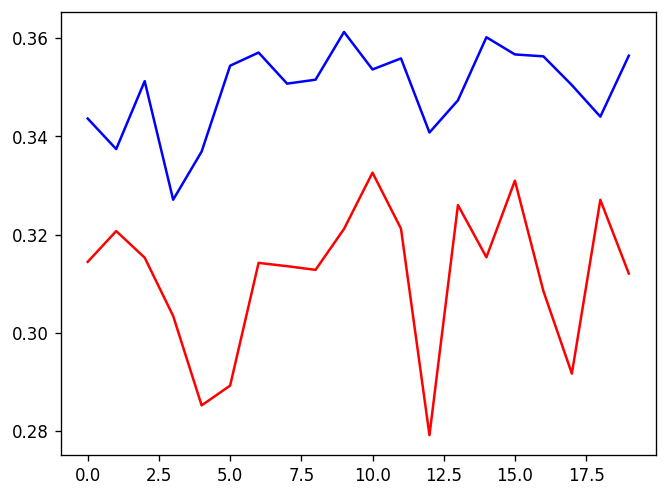

In [ ]:
plt.figure(dpi = 120)
plt.plot(r2_psuedo, c = 'r')
plt.plot(r2_quant, c = 'b')
plt.title("R2 Score")

In [ ]:
print(mae_psuedo, mae_quant, mse_psuedo, mse_quant, r2_psuedo, r2_quant)